# Datos de Tráfico en Madrid
### -Descargaremos los datos disponibles para los años 2018 , 2019 y 2020
### -Descartaremos los datos no relevantes para medir la intensidad de trafico de las calles de la ciudad de Madrid. 
### -Agruparemos los datos a medianas por dia y id de elemento urbano
### -Sacaremos un csv resultado a mergear con las otras ramas (meteo y calidad del aire) y integrar en el modelo de datos para visualizaciones (qlik sense)
### -eliminaremos los archivos utilizados en el proceso para que estos no suban al repositorio (por eficiencia y limitacion 500mb github)

In [1]:
#importamos librerías
import pandas as pd
import requests as requests
import datetime
import os

In [2]:
# definimos variables para cada zip que necesitamos cada url https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=33cb30c367e78410VgnVCM1000000b205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default
# tambien descargamos los recursos de mapas,.klm y csv con los id-ubicacion,
datos_trafico_1801="https://datos.madrid.es/egob/catalogo/208627-56-transporte-ptomedida-historico.zip"
datos_trafico_1802="https://datos.madrid.es/egob/catalogo/208627-57-transporte-ptomedida-historico.zip"
datos_trafico_1803="https://datos.madrid.es/egob/catalogo/208627-58-transporte-ptomedida-historico.zip"
datos_trafico_1804="https://datos.madrid.es/egob/catalogo/208627-59-transporte-ptomedida-historico.zip"
datos_trafico_1805="https://datos.madrid.es/egob/catalogo/208627-60-transporte-ptomedida-historico.zip"
datos_trafico_1806="https://datos.madrid.es/egob/catalogo/208627-61-transporte-ptomedida-historico.zip"
datos_trafico_1807="https://datos.madrid.es/egob/catalogo/208627-62-transporte-ptomedida-historico.zip"
datos_trafico_1808="https://datos.madrid.es/egob/catalogo/208627-63-transporte-ptomedida-historico.zip"
datos_trafico_1809="https://datos.madrid.es/egob/catalogo/208627-64-transporte-ptomedida-historico.zip"
datos_trafico_1810="https://datos.madrid.es/egob/catalogo/208627-65-transporte-ptomedida-historico.zip"
datos_trafico_1811="https://datos.madrid.es/egob/catalogo/208627-66-transporte-ptomedida-historico.zip"
datos_trafico_1812="https://datos.madrid.es/egob/catalogo/208627-67-transporte-ptomedida-historico.zip"
datos_trafico_1901="https://datos.madrid.es/egob/catalogo/208627-68-transporte-ptomedida-historico.zip"
datos_trafico_1902="https://datos.madrid.es/egob/catalogo/208627-69-transporte-ptomedida-historico.zip"
datos_trafico_1903="https://datos.madrid.es/egob/catalogo/208627-70-transporte-ptomedida-historico.zip"
datos_trafico_1904="https://datos.madrid.es/egob/catalogo/208627-71-transporte-ptomedida-historico.zip"
datos_trafico_1905="https://datos.madrid.es/egob/catalogo/208627-72-transporte-ptomedida-historico.zip"
datos_trafico_1906="https://datos.madrid.es/egob/catalogo/208627-73-transporte-ptomedida-historico.zip"
datos_trafico_1907="https://datos.madrid.es/egob/catalogo/208627-74-transporte-ptomedida-historico.zip"
datos_trafico_1908="https://datos.madrid.es/egob/catalogo/208627-75-transporte-ptomedida-historico.zip"
datos_trafico_1909="https://datos.madrid.es/egob/catalogo/208627-76-transporte-ptomedida-historico.zip"
datos_trafico_1910="https://datos.madrid.es/egob/catalogo/208627-77-transporte-ptomedida-historico.zip"
datos_trafico_1911="https://datos.madrid.es/egob/catalogo/208627-78-transporte-ptomedida-historico.zip"
datos_trafico_1912="https://datos.madrid.es/egob/catalogo/208627-79-transporte-ptomedida-historico.zip"
datos_trafico_2001="https://datos.madrid.es/egob/catalogo/208627-80-transporte-ptomedida-historico.zip"
datos_trafico_2002="https://datos.madrid.es/egob/catalogo/208627-81-transporte-ptomedida-historico.zip"
datos_trafico_2003="https://datos.madrid.es/egob/catalogo/208627-82-transporte-ptomedida-historico.zip"
datos_trafico_2004="https://datos.madrid.es/egob/catalogo/208627-83-transporte-ptomedida-historico.zip"
datos_trafico_2005="https://datos.madrid.es/egob/catalogo/208627-84-transporte-ptomedida-historico.zip"
datos_trafico_2006="https://datos.madrid.es/egob/catalogo/208627-85-transporte-ptomedida-historico.zip"
datos_trafico_2007="https://datos.madrid.es/egob/catalogo/208627-86-transporte-ptomedida-historico.zip"
datos_trafico_2008="https://datos.madrid.es/egob/catalogo/208627-87-transporte-ptomedida-historico.zip"
datos_trafico_2009="https://datos.madrid.es/egob/catalogo/208627-88-transporte-ptomedida-historico.zip"
datos_trafico_2010="https://datos.madrid.es/egob/catalogo/208627-89-transporte-ptomedida-historico.zip"
datos_trafico_2011="https://datos.madrid.es/egob/catalogo/208627-90-transporte-ptomedida-historico.zip"
datos_trafico_2012="https://datos.madrid.es/egob/catalogo/208627-91-transporte-ptomedida-historico.zip"
Estrucutra_ficheros_csv="https://datos.madrid.es/FWProjects/egob/Catalogo/Transporte/Trafico/ficheros/Estructura_DS_Contenido_Trafico_Historico.pdf"
Ubicacion_punto_medida_trafico='https://datos.madrid.es/egob/catalogo/202468-101-intensidad-trafico.csv'
Tráfico_intensidad_trafico_mapa_tramas_polig='https://datos.madrid.es/egob/catalogo/208223-7605492-trafico-intensidad-tramas.kml'
Tráfico_intensidad_trafico_mapa_tramas='https://datos.madrid.es/egob/catalogo/208223-7605484-trafico-intensidad-tramas.kml'

#utilizamos la libreria requests para descargar cada zip. Urllib da error 403 y 302 mientras que con la libreria requests estos errores se resuelven
#Tener en cuenta que cada zip pesa unos 80mb y hay 24. Pues necesita descargarse unos 2gb
#Una vez recorridos los archivos , agrupados por dia y concatenados en un dataframe debemos eliminarlos, ya que no subiran al repositorio github donde tenemos limitacion de 500mb. para ello utilizaremos remove


In [3]:
response = requests.get(datos_trafico_1801, allow_redirects=True) 
file = open('datos_trafico_1801.zip', 'wb').write(response.content)

In [4]:
response = requests.get(datos_trafico_1802, allow_redirects=True) 
file = open('datos_trafico_1802.zip', 'wb').write(response.content)

In [5]:
response = requests.get(datos_trafico_1803, allow_redirects=True) 
file = open('datos_trafico_1803.zip', 'wb').write(response.content)

In [6]:
response = requests.get(datos_trafico_1804, allow_redirects=True) 
file = open('datos_trafico_1804.zip', 'wb').write(response.content)

In [7]:
response = requests.get(datos_trafico_1805, allow_redirects=True) 
file = open('datos_trafico_1805.zip', 'wb').write(response.content)

In [8]:
response = requests.get(datos_trafico_1806, allow_redirects=True) 
file = open('datos_trafico_1806.zip', 'wb').write(response.content)

In [9]:
response = requests.get(datos_trafico_1807, allow_redirects=True) 
file = open('datos_trafico_1807.zip', 'wb').write(response.content)

In [10]:
response = requests.get(datos_trafico_1808, allow_redirects=True) 
file = open('datos_trafico_1808.zip', 'wb').write(response.content)

In [11]:
response = requests.get(datos_trafico_1809, allow_redirects=True) 
file = open('datos_trafico_1809.zip', 'wb').write(response.content)

In [12]:
response = requests.get(datos_trafico_1810, allow_redirects=True) 
file = open('datos_trafico_1810.zip', 'wb').write(response.content)

In [13]:
response = requests.get(datos_trafico_1811, allow_redirects=True) 
file = open('datos_trafico_1811.zip', 'wb').write(response.content)

In [14]:
response = requests.get(datos_trafico_1812, allow_redirects=True) 
file = open('datos_trafico_1812.zip', 'wb').write(response.content)

In [15]:
response = requests.get(datos_trafico_1901, allow_redirects=True) 
file = open('datos_trafico_1901.zip', 'wb').write(response.content)

In [16]:
response = requests.get(datos_trafico_1902, allow_redirects=True) 
file = open('datos_trafico_1902.zip', 'wb').write(response.content)

In [17]:
response = requests.get(datos_trafico_1903, allow_redirects=True) 
file = open('datos_trafico_1903.zip', 'wb').write(response.content)

In [18]:
response = requests.get(datos_trafico_1904, allow_redirects=True) 
file = open('datos_trafico_1904.zip', 'wb').write(response.content)

In [19]:
response = requests.get(datos_trafico_1905, allow_redirects=True) 
file = open('datos_trafico_1905.zip', 'wb').write(response.content)

In [20]:
response = requests.get(datos_trafico_1906, allow_redirects=True) 
file = open('datos_trafico_1906.zip', 'wb').write(response.content)

In [21]:
response = requests.get(datos_trafico_1907, allow_redirects=True) 
file = open('datos_trafico_1907.zip', 'wb').write(response.content)

In [22]:
response = requests.get(datos_trafico_1908, allow_redirects=True) 
file = open('datos_trafico_1908.zip', 'wb').write(response.content)

In [23]:
response = requests.get(datos_trafico_1909, allow_redirects=True) 
file = open('datos_trafico_1909.zip', 'wb').write(response.content)

In [24]:
response = requests.get(datos_trafico_1910, allow_redirects=True) 
file = open('datos_trafico_1910.zip', 'wb').write(response.content)

In [25]:
response = requests.get(datos_trafico_1911, allow_redirects=True) 
file = open('datos_trafico_1911.zip', 'wb').write(response.content)

In [26]:
response = requests.get(datos_trafico_1912, allow_redirects=True) 
file = open('datos_trafico_1912.zip', 'wb').write(response.content)

In [27]:
response = requests.get(datos_trafico_2001, allow_redirects=True) 
file = open('datos_trafico_2001.zip', 'wb').write(response.content)

In [28]:
response = requests.get(datos_trafico_2002, allow_redirects=True) 
file = open('datos_trafico_2002.zip', 'wb').write(response.content)

In [29]:
response = requests.get(datos_trafico_2003, allow_redirects=True) 
file = open('datos_trafico_2003.zip', 'wb').write(response.content)

In [30]:
response = requests.get(datos_trafico_2004, allow_redirects=True) 
file = open('datos_trafico_2004.zip', 'wb').write(response.content)

In [31]:
response = requests.get(datos_trafico_2005, allow_redirects=True) 
file = open('datos_trafico_2005.zip', 'wb').write(response.content)

In [32]:
response = requests.get(datos_trafico_2006, allow_redirects=True) 
file = open('datos_trafico_2006.zip', 'wb').write(response.content)

In [33]:
response = requests.get(datos_trafico_2007, allow_redirects=True) 
file = open('datos_trafico_2007.zip', 'wb').write(response.content)

In [34]:
response = requests.get(datos_trafico_2008, allow_redirects=True) 
file = open('datos_trafico_2008.zip', 'wb').write(response.content)

In [35]:
response = requests.get(datos_trafico_2009, allow_redirects=True) 
file = open('datos_trafico_2009.zip', 'wb').write(response.content)

In [36]:
response = requests.get(datos_trafico_2010, allow_redirects=True) 
file = open('datos_trafico_2010.zip', 'wb').write(response.content)

In [37]:
response = requests.get(datos_trafico_2011, allow_redirects=True) 
file = open('datos_trafico_2011.zip', 'wb').write(response.content)

In [38]:
response = requests.get(datos_trafico_2012, allow_redirects=True) 
file = open('datos_trafico_2012.zip', 'wb').write(response.content)

In [39]:
response = requests.get(Estrucutra_ficheros_csv, allow_redirects=True) 
file = open('Estructura_DS_Contenido_Trafico_Historico.pdf', 'wb').write(response.content)

response = requests.get(Ubicacion_punto_medida_trafico, allow_redirects=True) 
file = open('202468-101-intensidad-trafico.csv', 'wb').write(response.content)

response = requests.get(Tráfico_intensidad_trafico_mapa_tramas_polig, allow_redirects=True) 
file = open('208223-7605492-trafico-intensidad-tramas.kml', 'wb').write(response.content)

response = requests.get(Tráfico_intensidad_trafico_mapa_tramas, allow_redirects=True) 
file = open('208223-7605484-trafico-intensidad-tramas.kml', 'wb').write(response.content)

    Mientras descargamos todos los datos podemos entender su contenido de la documentacion

## Contenido CSV
#### Los diversos sistemas de control de tráfico de la ciudad de Madrid proporcionan periódicamente y de forma automática datos de todos los detectores de vehículos de los puntos de medida que controlan. La base de datos SICTRAM los registra e integra sobre periodos de 15 minutos.
#### Si el sensor no proporciona información de una de las muestras del periodo, no se contabilizará esa información; no obstante, si el sensor proporciona información pero los parámetros de calidad de la misma no son óptimos la información se integra, pero se reporta como posible error. El error puede deberse porque el sensor detecta parámetros fuera de los rangos establecidos o porque alguno de los sensores que componen el punto de medida no esté operativo (por ejemplo, en un punto de medida de 4 carriles uno de los carriles no está funcionando).
#### Los históricos de Puntos de Medida se exportan en un archivo CSV con los siguientes campos:
#### Nombre / Tipo / Descripción
    * idelem / Entero / Identificación única del Punto de Medida en los sistemas de control del tráfico del Ayuntamiento de Madrid.
    
    * fecha / Fecha / Fecha y hora oficiales de Madrid con formato yyyy-mm-dd hh:mi:ss
    
    * identif / Texto / Identificador del Punto de Medida en los Sistemas de Tráfico (se proporciona por compatibilidad hacia atrás).
    
    * tipo_elem / Texto / Nombre del Tipo de Punto de Medida: Urbano o M30.
    
    * Intensidad / Entero /Intensidad del Punto de Medida en el periodo de 15 minutos (vehículos/hora). Un valor negativo implica la ausencia de datos.
    
    * ocupacion / Entero / Tiempo de Ocupación del Punto de Medida en el periodo de 15 minutos (%). Un valor negativo implica la ausencia de datos.
    
    * carga / Entero / Carga de vehículos en el periodo de 15 minutos. Parámetro que tiene en cuenta intensidad, ocupación y capacidad de la vía y establece el grado de uso de la vía de 0 a 100. Un valor negativo implica la ausencia de datos.
    
    *vmed / Entero / Velocidad media de los vehículos en el periodo de 15 minutos (Km./h). Sólo para puntos de medida interurbanos M30. Un valor negativo implica la ausencia de datos.
    
    * error / Texto / Indicación de si ha habido al menos una muestra errónea o sustituida en el periodo de 15 minutos.
        N: no ha habido errores ni sustituciones
        E: los parámetros de calidad de alguna de las muestras integradas no son óptimos.
        S: alguna de las muestras recibidas era totalmente errónea y no se ha integrado.
        
    * periodo_integracion / Entero / Número de muestras recibidas y consideradas para el periodo de integración.

In [40]:
#carga de datos de trafico en pandas. Empezamos con uno de ellos para decidir como trataremos los datos
trafico_1801 = pd.read_csv('datos_trafico_1801.zip', compression='zip', header=0, sep=';', quotechar='"')

In [41]:
#visualizamos uno de los dataframes
trafico_1801.head()

,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion
0,1001,2018-01-01 00:00:00,PUNTOS MEDIDA M-30,204,12,0,73,N,5
1,1002,2018-01-01 00:00:00,PUNTOS MEDIDA M-30,252,1,0,79,N,5
2,1003,2018-01-01 00:00:00,PUNTOS MEDIDA M-30,420,2,0,82,N,5
3,1006,2018-01-01 00:00:00,PUNTOS MEDIDA M-30,288,1,0,75,N,5
4,1009,2018-01-01 00:00:00,PUNTOS MEDIDA M-30,276,0,0,76,N,5


In [42]:
#nos interesan solo los registros de los elementos de medida relacionados con la ciudad de madrid, no los de carreteras de madrid.
#tampoco queremos datos erroneos
#por ello nos quedaremos solo con los elementos tipo "URB" y error "N"
trafico_1801['tipo_elem'].value_counts(ascending=False)

PUNTOS MEDIDA URBANOS    10339086
PUNTOS MEDIDA M-30        1212028
Name: tipo_elem, dtype: int64

In [43]:
trafico_1801 = trafico_1801.loc[trafico_1801.tipo_elem.str.contains('URB')]
trafico_1801 = trafico_1801.loc[trafico_1801.error =='N']
trafico_1801.head()

,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion
47,3395,2018-01-01 00:00:00,PUNTOS MEDIDA URBANOS,65,0,2,0,N,9
48,3396,2018-01-01 00:00:00,PUNTOS MEDIDA URBANOS,60,0,2,0,N,3
49,3397,2018-01-01 00:00:00,PUNTOS MEDIDA URBANOS,107,0,5,0,N,15
50,3398,2018-01-01 00:00:00,PUNTOS MEDIDA URBANOS,59,1,2,0,N,15
51,3399,2018-01-01 00:00:00,PUNTOS MEDIDA URBANOS,48,1,4,0,N,8


In [44]:
trafico_1801.shape

(10339086, 9)

In [45]:
trafico_1801.describe()

,id,intensidad,ocupacion,carga,vmed,periodo_integracion
count,1.033909e+07,1.033909e+07,1.033909e+07,1.033909e+07,10339086.0,1.033909e+07
mean,5.645018e+03,3.403305e+02,6.825779e+00,1.997338e+01,0.0,1.428319e+01
std,1.770821e+03,4.687869e+02,1.149427e+01,1.777866e+01,0.0,2.187683e+00
min,3.395000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.000000e+00
25%,4.388000e+03,6.100000e+01,1.000000e+00,5.000000e+00,0.0,1.500000e+01
50%,5.323000e+03,1.860000e+02,3.000000e+00,1.500000e+01,0.0,1.500000e+01
75%,6.248000e+03,4.520000e+02,7.000000e+00,3.100000e+01,0.0,1.500000e+01
max,1.029800e+04,7.889800e+04,1.000000e+02,1.000000e+02,0.0,1.500000e+01


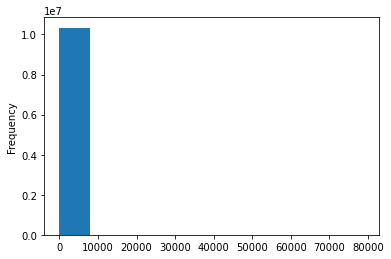

In [46]:
trafico_1801['intensidad'].plot.hist();

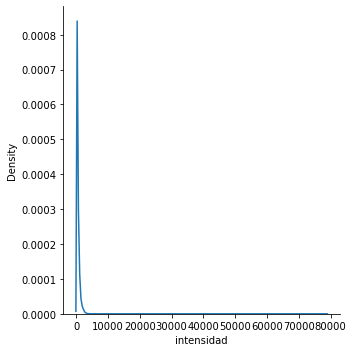

In [47]:
import seaborn as sns
sns.displot(trafico_1801, x="intensidad", kind="kde")

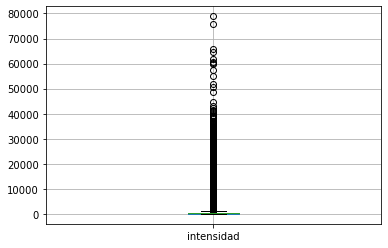

In [48]:
trafico_1801.boxplot(column=["intensidad"]);

### Vemos que hay valores atipicos en algunas mediciones por fecha y hora pero como trabajaremos medianas por id-dia (qlik) o dia esta intensidad de trafico se "normalizara"

In [49]:
##descartamos las columnas que no utilizaremos y nos quedamos con fecha,intensidad,ocupacion, carga y id
trafico_1801=trafico_1801.drop(columns=['tipo_elem','vmed','error','periodo_integracion'])
trafico_1801.head()

,id,fecha,intensidad,ocupacion,carga
47,3395,2018-01-01 00:00:00,65,0,2
48,3396,2018-01-01 00:00:00,60,0,2
49,3397,2018-01-01 00:00:00,107,0,5
50,3398,2018-01-01 00:00:00,59,1,2
51,3399,2018-01-01 00:00:00,48,1,4


In [50]:
trafico_1801.dtypes

id             int64
fecha         object
intensidad     int64
ocupacion      int64
carga          int64
dtype: object

In [51]:
#antes de agrupar por campo fecha hay que convertirla en fecha tipo yyyy-mm-dd
trafico_1801["fecha"]=pd.to_datetime(trafico_1801["fecha"], format='%Y-%m-%d', errors='coerce')
trafico_1801['fecha'] = pd.DatetimeIndex(trafico_1801['fecha']).date
trafico_1801.head()

,id,fecha,intensidad,ocupacion,carga
47,3395,2018-01-01,65,0,2
48,3396,2018-01-01,60,0,2
49,3397,2018-01-01,107,0,5
50,3398,2018-01-01,59,1,2
51,3399,2018-01-01,48,1,4


In [52]:
## en la documentacion comentan que en ausencia de datos vendran un valor negativo, concretamente -1. pero no me encuentra estos valores con pandas. hay que ver como tratarlos
trafico_1801.isin(['-1']).sum(axis=0)


id            0
fecha         0
intensidad    0
ocupacion     0
carga         0
dtype: int64

In [53]:
# agruparemos cada valor de las todas las estaciones medida a 1 valor mediana por fecha, asi calculamos valores por fecha para la ciudad de madrid
trafico_intensidad= trafico_1801.groupby(['fecha','id'])['intensidad'].median()
trafico_ocupacion= trafico_1801.groupby(['fecha','id'])['ocupacion'].median()
trafico_carga= trafico_1801.groupby(['fecha','id'])['carga'].median()

trafico_intensidad = pd.merge(trafico_intensidad, trafico_ocupacion,left_index=True, right_index=True)
trafico_1801 = pd.merge(trafico_intensidad, trafico_carga,left_index=True, right_index=True)
trafico_1801.reset_index(level=0, inplace=True)
trafico_1801.shape

(110209, 4)

In [54]:
trafico_1801.head()

,fecha,intensidad,ocupacion,carga
id,,,,
3395,2018-01-01,149.0,1.0,8.0
3396,2018-01-01,141.5,0.0,11.5
3397,2018-01-01,236.0,2.0,17.0
3398,2018-01-01,208.0,3.0,9.5
3399,2018-01-01,113.0,1.5,8.5


In [55]:
#necesitamos exportar el id que tenemos en indice como un campo. 
trafico_1801=trafico_1801.reset_index()


In [56]:
trafico_1801.head()

,id,fecha,intensidad,ocupacion,carga
0,3395,2018-01-01,149.0,1.0,8.0
1,3396,2018-01-01,141.5,0.0,11.5
2,3397,2018-01-01,236.0,2.0,17.0
3,3398,2018-01-01,208.0,3.0,9.5
4,3399,2018-01-01,113.0,1.5,8.5


In [57]:
# antes de concatenear tenemos que hacer el mismo tratamiento de datos 23 veces mas, 1 por cada resto de meses, ya que por falta de memoria no podemos concatenar los datos antes de agruparlos por fechas
# agregaremos todos los pasos en una funcion para facilitarlo 

def tratamiento_datos_csv_trafico_madrid(actuality):
    #cargar el zip a un df
    trafico = pd.read_csv('datos_trafico_'+str(actuality)+'.zip', compression='zip', header=0, sep=';', quotechar='"')
    #seleccionar solo los datos tipo urbanos sin errores
    trafico = trafico.loc[trafico.tipo_elem.str.contains('URB')]
    trafico = trafico.loc[trafico.error =='N']
    #hacer drop a las columnas inecesarias
    trafico=trafico.drop(columns=['tipo_elem','vmed','error','periodo_integracion'])
    #convertir la fechahora a fecha
    trafico["fecha"]=pd.to_datetime(trafico["fecha"], format='%Y-%m-%d', errors='coerce')
    trafico['fecha']=pd.DatetimeIndex(trafico['fecha']).date
    #agrupar valores a mediana por cada fecha para conseguir 1 valor/dia-estacion.
    trafico_intensidad= trafico.groupby(['fecha','id'])['intensidad'].median()
    trafico_ocupacion= trafico.groupby(['fecha','id'])['ocupacion'].median()
    trafico_carga= trafico.groupby(['fecha','id'])['carga'].median()
    trafico_intensidad = pd.merge(trafico_intensidad, trafico_ocupacion,left_index=True, right_index=True)
    trafico= pd.merge(trafico_intensidad, trafico_carga,left_index=True, right_index=True)
    trafico.reset_index(level=0, inplace=True)
    trafico=trafico.reset_index()
    return trafico



In [58]:
#ejecutamos la funcion para cada actuality y guardamos su resultado en una variable que contendra el dataframe a concatenar.
# va a tardar un poco ademas de consumir recursos.

#trafico_1801=tratamiento_datos_csv_trafico_madrid(1801)
trafico_1802=tratamiento_datos_csv_trafico_madrid(1802)
trafico_1803=tratamiento_datos_csv_trafico_madrid(1803)
trafico_1804=tratamiento_datos_csv_trafico_madrid(1804)
trafico_1805=tratamiento_datos_csv_trafico_madrid(1805)
trafico_1806=tratamiento_datos_csv_trafico_madrid(1806)
trafico_1807=tratamiento_datos_csv_trafico_madrid(1807)
trafico_1808=tratamiento_datos_csv_trafico_madrid(1808)
trafico_1809=tratamiento_datos_csv_trafico_madrid(1809)
trafico_1810=tratamiento_datos_csv_trafico_madrid(1810)
trafico_1811=tratamiento_datos_csv_trafico_madrid(1811)
trafico_1812=tratamiento_datos_csv_trafico_madrid(1812)

trafico_1901=tratamiento_datos_csv_trafico_madrid(1901)
trafico_1902=tratamiento_datos_csv_trafico_madrid(1902)
trafico_1903=tratamiento_datos_csv_trafico_madrid(1903)
trafico_1904=tratamiento_datos_csv_trafico_madrid(1904)
trafico_1905=tratamiento_datos_csv_trafico_madrid(1905)
trafico_1906=tratamiento_datos_csv_trafico_madrid(1906)
trafico_1907=tratamiento_datos_csv_trafico_madrid(1907)
trafico_1908=tratamiento_datos_csv_trafico_madrid(1908)
trafico_1909=tratamiento_datos_csv_trafico_madrid(1909)
trafico_1910=tratamiento_datos_csv_trafico_madrid(1910)
trafico_1911=tratamiento_datos_csv_trafico_madrid(1911)
trafico_1912=tratamiento_datos_csv_trafico_madrid(1912)

trafico_2001=tratamiento_datos_csv_trafico_madrid(2001)
trafico_2002=tratamiento_datos_csv_trafico_madrid(2002)
trafico_2003=tratamiento_datos_csv_trafico_madrid(2003)
trafico_2004=tratamiento_datos_csv_trafico_madrid(2004)
trafico_2005=tratamiento_datos_csv_trafico_madrid(2005)
trafico_2006=tratamiento_datos_csv_trafico_madrid(2006)
trafico_2007=tratamiento_datos_csv_trafico_madrid(2007)
trafico_2008=tratamiento_datos_csv_trafico_madrid(2008)
trafico_2009=tratamiento_datos_csv_trafico_madrid(2009)
trafico_2010=tratamiento_datos_csv_trafico_madrid(2010)
trafico_2011=tratamiento_datos_csv_trafico_madrid(2011)
trafico_2012=tratamiento_datos_csv_trafico_madrid(2012)

In [59]:
#concatenamos todos los dataframes en 1
trafico_mad=pd.concat([
trafico_1801,
trafico_1802,
trafico_1803,
trafico_1804,
trafico_1805,
trafico_1806,
trafico_1807,
trafico_1808,
trafico_1809,
trafico_1810,
trafico_1811,
trafico_1812,
trafico_1901,
trafico_1902,
trafico_1903,
trafico_1904,
trafico_1905,
trafico_1906,
trafico_1907,
trafico_1908,
trafico_1909,
trafico_1910,
trafico_1911,
trafico_1912,
trafico_2001,
trafico_2002,
trafico_2003,
trafico_2004,
trafico_2005,
trafico_2006,
trafico_2007,
trafico_2008,
trafico_2009,
trafico_2010,
trafico_2011,
trafico_2012,    
]) 

In [60]:
trafico_mad.shape

(3867411, 5)

In [61]:
trafico_mad.head()

,id,fecha,intensidad,ocupacion,carga
0,3395,2018-01-01,149.0,1.0,8.0
1,3396,2018-01-01,141.5,0.0,11.5
2,3397,2018-01-01,236.0,2.0,17.0
3,3398,2018-01-01,208.0,3.0,9.5
4,3399,2018-01-01,113.0,1.5,8.5


In [62]:
trafico_mad.tail(40)

,id,fecha,intensidad,ocupacion,carga
113808,10633,2020-12-31,40.0,0.0,0.0
113809,10634,2020-12-31,32.0,1.0,1.0
113810,10635,2020-12-31,88.0,0.0,2.0
113811,10636,2020-12-31,157.0,1.0,3.0
113812,10637,2020-12-31,571.5,6.0,23.0
113813,10638,2020-12-31,126.0,3.0,10.0
113814,10639,2020-12-31,26.0,0.0,6.0
113815,10640,2020-12-31,185.0,2.0,8.5
113816,10641,2020-12-31,61.0,1.0,5.0
113817,10642,2020-12-31,59.5,0.0,5.0


In [63]:
trafico_mad.describe()

,id,intensidad,ocupacion,carga
count,3.867411e+06,3.866067e+06,3.863958e+06,3.867023e+06
mean,7.692580e+03,3.279947e+02,5.738035e+00,1.892881e+01
std,1.422046e+06,3.676575e+02,9.611764e+00,1.347315e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.444000e+03,9.400000e+01,1.000000e+00,8.500000e+00
50%,5.398000e+03,2.070000e+02,3.000000e+00,1.600000e+01
75%,6.352000e+03,4.345000e+02,6.000000e+00,2.650000e+01
max,1.140851e+09,7.940100e+04,1.000000e+02,1.000000e+02


In [64]:
trafico_mad[trafico_mad.isnull().any(1)]

,id,fecha,intensidad,ocupacion,carga
23,3419,2018-09-01,14.0,NaN,2.0
47,3446,2018-09-01,114.0,NaN,8.0
70,3471,2018-09-01,53.0,NaN,1.0
82,3483,2018-09-01,23.0,NaN,2.0
304,3770,2018-09-01,46.0,NaN,4.0
...,...,...,...,...,...
100705,5171,2018-11-30,48.0,NaN,4.0
101572,6109,2018-11-30,NaN,91.0,44.0
101644,6181,2018-11-30,NaN,66.0,43.0
102080,6831,2018-11-30,154.0,NaN,11.0


In [65]:
#exportaremos los datos trafico_mad a csv:
trafico_mad.to_csv('trafico_mad_con_id_estaciones.csv', index=False) 

In [66]:
##descartamos las columnas que no utilizaremos y nos quedamos con fecha,intensidad,ocupacion, carga y id
trafico_mad=trafico_mad.drop(columns=['id'])
trafico_mad.head()

,fecha,intensidad,ocupacion,carga
0,2018-01-01,149.0,1.0,8.0
1,2018-01-01,141.5,0.0,11.5
2,2018-01-01,236.0,2.0,17.0
3,2018-01-01,208.0,3.0,9.5
4,2018-01-01,113.0,1.5,8.5


In [67]:
# agruparemos cada valor de las todas las estaciones medida a 1 valor mediana por fecha, asi calculamos valores por fecha para la ciudad de madrid
trafico_intensidad= trafico_mad.groupby('fecha')['intensidad'].median()
trafico_ocupacion= trafico_mad.groupby('fecha')['ocupacion'].median()
trafico_carga= trafico_mad.groupby('fecha')['carga'].median()

trafico_intensidad = pd.merge(trafico_intensidad, trafico_ocupacion,left_index=True, right_index=True)
trafico= pd.merge(trafico_intensidad, trafico_carga,left_index=True, right_index=True)
trafico.reset_index(level=0, inplace=True)
trafico.shape

(1096, 4)

In [70]:
#exportaremos los datos trafico_mad a csv:
trafico.to_csv('trafico_mad.csv', index=False) 

In [71]:
# una vez todo procesado no necesitamos los zip originales
os.remove("datos_trafico_1801.zip")
os.remove("datos_trafico_1802.zip")
os.remove("datos_trafico_1803.zip")
os.remove("datos_trafico_1804.zip")
os.remove("datos_trafico_1805.zip")
os.remove("datos_trafico_1806.zip")
os.remove("datos_trafico_1807.zip")
os.remove("datos_trafico_1808.zip")
os.remove("datos_trafico_1809.zip")
os.remove("datos_trafico_1810.zip")
os.remove("datos_trafico_1811.zip")
os.remove("datos_trafico_1812.zip")
os.remove("datos_trafico_1901.zip")
os.remove("datos_trafico_1902.zip")
os.remove("datos_trafico_1903.zip")
os.remove("datos_trafico_1904.zip")
os.remove("datos_trafico_1905.zip")
os.remove("datos_trafico_1906.zip")
os.remove("datos_trafico_1907.zip")
os.remove("datos_trafico_1908.zip")
os.remove("datos_trafico_1909.zip")
os.remove("datos_trafico_1910.zip")
os.remove("datos_trafico_1911.zip")
os.remove("datos_trafico_1912.zip")
os.remove("datos_trafico_2001.zip")
os.remove("datos_trafico_2002.zip")
os.remove("datos_trafico_2003.zip")
os.remove("datos_trafico_2004.zip")
os.remove("datos_trafico_2005.zip")
os.remove("datos_trafico_2006.zip")
os.remove("datos_trafico_2007.zip")
os.remove("datos_trafico_2008.zip")
os.remove("datos_trafico_2009.zip")
os.remove("datos_trafico_2010.zip")
os.remove("datos_trafico_2011.zip")
os.remove("datos_trafico_2012.zip")

FileNotFoundError: [WinError 2] El sistema no puede encontrar el archivo especificado: 'datos_trafico_1801.zip'